## Pre Processing

In [32]:
#!pip install pandas-profiling==2.7.1

In [33]:
# Import pandas library
import pandas as pd

In [34]:
# from google.colab import files
# uploaded = files.upload()

In [35]:
# Read csv data file
df = pd.read_csv('/content/weatherAUS.csv')

In [36]:
# View the number of rows and columns
df.shape

(29982, 23)

In [37]:
# View the first 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [38]:
# Drop column
df = df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date', 'Location'],  axis = 1)
df.head()



,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [39]:
# Remove null value in RainToday and RainTomorrow
import numpy as np

df = df.dropna()
df.shape


(20276, 17)

In [40]:
# Import LabelEncoder
from sklearn import preprocessing
# Create LabelEncoder
le = preprocessing.LabelEncoder()
# Convert string categories into numbers for RainToday and RainTomorrow
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [41]:
# Target column
target = df['RainTomorrow']

# Features column
features = df.drop('RainTomorrow', axis = 1)

In [ ]:
# importing packages
import seaborn
import matplotlib.pyplot as plt

############# Main Section ############
# loading dataset using seaborn
# pairplot with hue sex
seaborn.pairplot(df, hue ='RainTomorrow')
# to show
plt.show()

# This code is contributed by Deepanshu Rustagi.


In [42]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier (strategy = "uniform")

# Train model
dummy.fit( features, target)

# Accuracy scores
scores = dummy.score(features, target) 
 
# Print scores
scores

0.5018248175182481

In [43]:
#from pandas_profiling import ProfileReport
#report = ProfileReport(df)

#print(repr(report.report))

#report.to_widgets()

In [44]:
# Split data into train and test sets

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.125, random_state = 0)

##KNN


In [45]:
# Training a KNN model

# Import k-nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

# Import function for k-fold cross validation
from sklearn.model_selection import cross_val_score

# Create a KNN classifier with k = 1
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='brute')

# Train the model using the training set
knn.fit(x_train, y_train)

# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(knn, x_train, y_train, cv = 10, scoring = 'accuracy')

# Print scores
scores

array([0.78985915, 0.80326945, 0.80101466, 0.80439684, 0.81285231,
       0.80157835, 0.80552424, 0.79988726, 0.80777903, 0.80665163])

In [46]:
# Predict the target for the development dataset
dev_predict = knn.predict(x_test)
dev_predict


array([0, 0, 0, ..., 1, 1, 1])

In [47]:
# Evaluate the knn model on development set

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, dev_predict))

Accuracy (Test):  0.8011834319526627


Tune Parameter KNN

In [48]:
# Create a KNN classifier with k = 5
knn = KNeighborsClassifier(n_neighbors = 24)
# Train the model using the training set
knn.fit(x_train, y_train)
# Predict the target for the development set
dev_predict = knn.predict(x_test)
# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

Accuracy:  0.8429980276134122


In [49]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, dev_predict))

# Print precision, recall and F1
print(classification_report(y_test, dev_predict))

[[1910   54]
 [ 344  227]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1964
           1       0.81      0.40      0.53       571

    accuracy                           0.84      2535
   macro avg       0.83      0.69      0.72      2535
weighted avg       0.84      0.84      0.82      2535



In [50]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'n_neighbors': range(1, 50), 'weights':('uniform', 'distance'), 'algorithm':('ball_tree','kd_tree' , 'brute')}
#knn2 = KNeighborsClassifier()
#clf = GridSearchCV(knn2, parameters, cv=10, iid= True)
#clf.fit(features, target)

In [51]:
#print(clf.best_score_)
#print(clf.best_params_)

## Decision Tree

In [52]:
# Training a decision tree model

# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Import function for k-fold cross validation
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier with default parameters
dtree = DecisionTreeClassifier(criterion='entropy', splitter = 'random')

# Train the model using the training set
dtree.fit(x_train, y_train)

# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(dtree, x_train, y_train, cv = 10, scoring = 'accuracy')

# Print scores
scores

array([0.76788732, 0.78466742, 0.7903044 , 0.79988726, 0.76719278,
       0.79481398, 0.78635851, 0.77733935, 0.78128523, 0.79819617])

In [53]:
# Predict the target for the development dataset
dev_predict = dtree.predict(x_test)
dev_predict

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, dev_predict))

# Print precision, recall and F1
print(classification_report(y_test, dev_predict))

[[1702  262]
 [ 279  292]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1964
           1       0.53      0.51      0.52       571

    accuracy                           0.79      2535
   macro avg       0.69      0.69      0.69      2535
weighted avg       0.78      0.79      0.79      2535



Tune Parameter

In [55]:
# Create a decision tree classifier with criterion = entropy and max_depth = 3
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Train the model using the training set
dtree.fit(x_train, y_train)

# Predict the target for the development dataset
dev_predict = dtree.predict(x_test)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, dev_predict))

Accuracy:  0.8260355029585799


Visualization

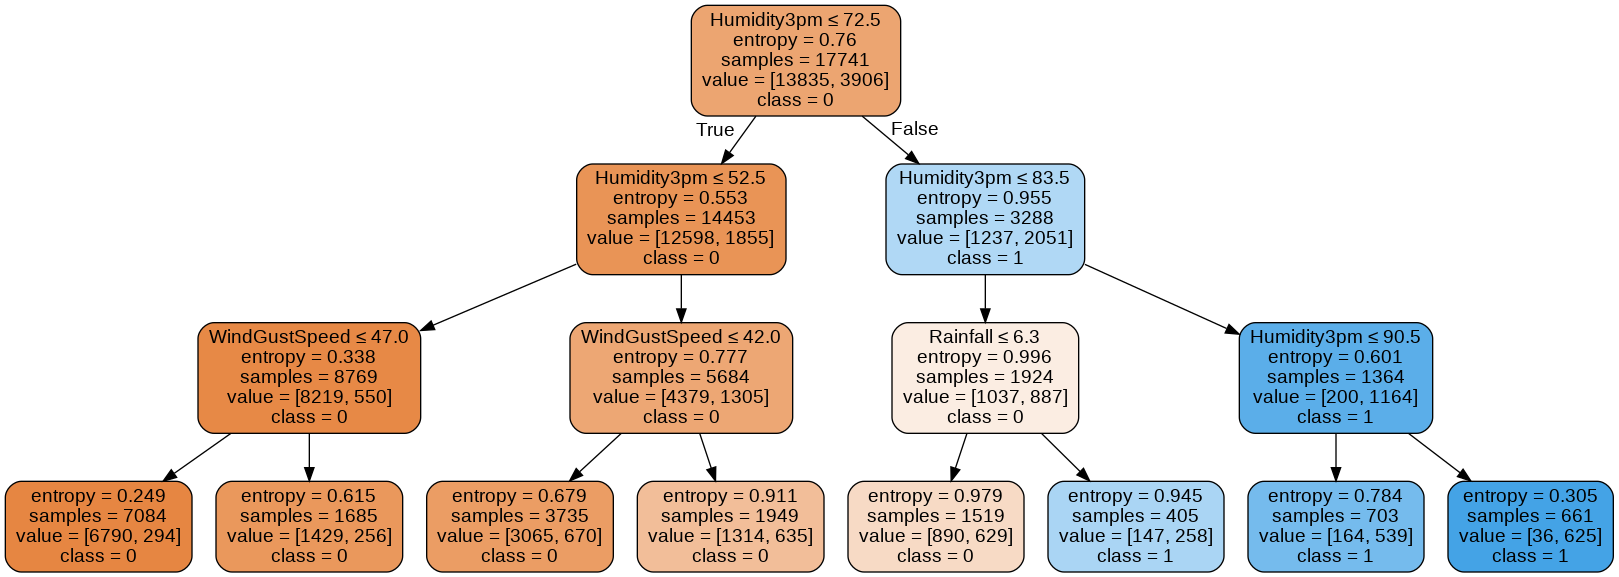

In [56]:
# Load required libraries
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

# Visualize decision tree
dot_data = StringIO()
tree.export_graphviz(dtree,
                     out_file = dot_data,
                     class_names = ['0', '1'], # name of each of the target classes in asce
                     feature_names = features.columns, # the feature names.
                     filled = True, # whether to fill in the boxes with colors.
                     rounded = True, # whether to round the corners of the boxes.
                     special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [57]:
# Load export_text library
from sklearn.tree.export import export_text
tree_rules = export_text(dtree, feature_names=list(x_train))

# Print deccision tree rules
print(tree_rules)

|--- Humidity3pm <= 72.50
|   |--- Humidity3pm <= 52.50
|   |   |--- WindGustSpeed <= 47.00
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  47.00
|   |   |   |--- class: 0
|   |--- Humidity3pm >  52.50
|   |   |--- WindGustSpeed <= 42.00
|   |   |   |--- class: 0
|   |   |--- WindGustSpeed >  42.00
|   |   |   |--- class: 0
|--- Humidity3pm >  72.50
|   |--- Humidity3pm <= 83.50
|   |   |--- Rainfall <= 6.30
|   |   |   |--- class: 0
|   |   |--- Rainfall >  6.30
|   |   |   |--- class: 1
|   |--- Humidity3pm >  83.50
|   |   |--- Humidity3pm <= 90.50
|   |   |   |--- class: 1
|   |   |--- Humidity3pm >  90.50
|   |   |   |--- class: 1



## SVM

In [ ]:
# Import function for k-fold cross validation
from sklearn.model_selection import cross_val_score

# Import SVM classifier
from sklearn.svm import SVC

# Create a SVM classifier with linear kernel
svmlinear = SVC(kernel = 'sigmoid')

# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(svmlinear, x_train, y_train, cv = 10, scoring = 'accuracy')

# Display the array containing accuracy from 10 folds or iterations
scores

In [ ]:
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Train model
svmlinear.fit(x_train, y_train)

# Predict the target for the test dataset
test_predict = svmlinear.predict(x_test)

# Compute the model accuracy on the development set: How often is the classifier correct?
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

In [ ]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, test_predict))

# Print precision, recall and F1
print(classification_report(y_test, test_predict))

[link text](https://)Tuning parameter

In [ ]:
from sklearn.svm import SVC

# Create a SVM classifier with linear kernel
svmlinear = SVC(kernel = 'linear', C = 10)

# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(svmlinear, x_train, y_train, cv = 10, scoring = 'accuracy')

# Display the array containing accuracy from 10 folds or iterations
scores

In [ ]:
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

In [ ]:
# Import GridSearch from the sklearn library
from sklearn.model_selection import GridSearchCV

# The param_grid specifies one grid should be explored
param_grid = {'C': [1, 10, 100, 1000]}

# Fit on the dataset on all parameter combinations in param_grid
# Retain the best combination
grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv = 5, iid = True)

In [ ]:
# Import GridSearch from the sklearn library
from sklearn.model_selection import GridSearchCV

# The param_grid specifies one grid should be explored
param_grid = {'C': [1, 10, 100, 1000]}

# Fit on the dataset on all parameter combinations in param_grid
# Retain the best combination
grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv = 5, iid = True)

# Show the parameters yielding the best model
grid_search

In [ ]:
# Display the best parameter C value
#grid_search.best_params_

In [ ]:
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(rfc, x_train, y_train, cv = 10, scoring = 'accuracy')
print(scores)
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

In [ ]:
# Bagging

In [ ]:
# Import the bagging classifier
from sklearn.ensemble import BaggingClassifier
# Import the base classifier
from sklearn.tree import DecisionTreeClassifier
# Import function for k-fold cross validation
from sklearn.model_selection import cross_val_score
# Create the base classifier
base = DecisionTreeClassifier()
# Create the bagging classifier
model_bagging = BaggingClassifier(base_estimator = base, n_estimators = 10, random_state = 7)
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(model_bagging, x_train, y_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
print(scores)
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Running prediction
model_bagging.fit(x_train, y_train)
# Predict the target for the test dataset
test_predict = model_bagging.predict(x_test)
# Compute the model accuracy on the test set
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

In [ ]:
# Boosting

In [ ]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
# Create the base classifier
base = DecisionTreeClassifier()
# Create the AdaBoost classifier
model_boosting = AdaBoostClassifier(base_estimator = base, n_estimators = 10, random_state = 7)
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(model_boosting, x_train, y_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
print(scores)
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

In [ ]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Running prediction
model_boosting.fit(x_train, y_train)
# Predict the target for the test dataset
test_predict = model_boosting.predict(x_test)
# Compute the model accuracy on the test set
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

In [ ]:
# Voting

In [ ]:
# Import the base classifiers: Gaussian Naive Bayes, Decision Tree and SVM
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# Import VotingClassifier
from sklearn.ensemble import VotingClassifier
# Create the base classifiers
clf1 = GaussianNB()
clf2 = DecisionTreeClassifier(random_state = 12)
clf3 = SVC(kernel = 'linear')
# Create VotingClassifier
model_voting = VotingClassifier(estimators = [('gnb', clf1), ('dt', clf2), ('svm', clf3)], \
 voting = 'hard')
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(model_voting, x_train, y_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
print(scores)
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

In [ ]:
# Running prediction
model_voting.fit(x_train, y_train)
# Predict the target for the test dataset
test_predict = model_voting.predict(x_test)
# Compute the model accuracy on the test set
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))

In [ ]:
# Stacking

In [ ]:
# Import the base classifiers: Gaussian Naive Bayes, Decision Tree, SVM and KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Import StackingClassifier
from sklearn.ensemble import StackingClassifier
# Create the base classifiers
clf1 = GaussianNB()
clf2 = DecisionTreeClassifier(random_state = 12)
clf3 = SVC(kernel = 'linear')
# Create StackingClassifier
model_stacking = StackingClassifier(estimators = [('gnb', clf1), ('dt', clf2), ('svm', clf3)], \
 final_estimator = KNeighborsClassifier(n_neighbors = 5))
# Use 10-fold cross validation to perform training and validation on the training set
# Parameter scoring = 'accuracy' will compute accuracy
scores = cross_val_score(model_stacking, x_train, y_train, cv = 10, scoring = 'accuracy')
# Display the array containing accuracy from 10 folds or iterations
print(scores)
# Print the mean accuracy score
print('Accuracy (Validation) =', scores.mean())

In [ ]:
# Running prediction
model_stacking.fit(x_train, y_train)
# Predict the target for the test dataset
test_predict = model_stacking.predict(x_test)
# Compute the model accuracy on the test set
print("Accuracy (Test): ", metrics.accuracy_score(y_test, test_predict))